In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import seaborn as sns
from scipy import stats


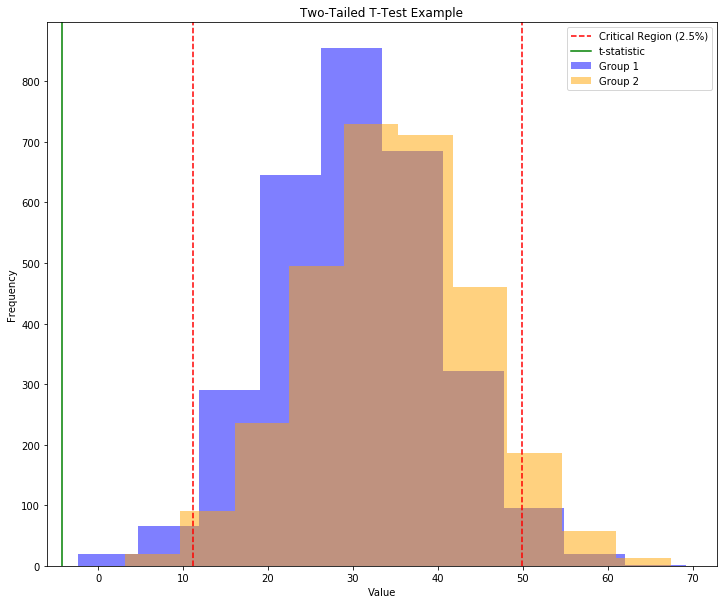

T-Statistic: -16.6798
P-Value: 0.0000


In [18]:
np.random.seed(42)  # For reproducibility
group1_data = np.random.normal(loc=30, scale=10, size=3000)
group2_data = np.random.normal(loc=35, scale=10, size=3000)

# Perform a two-tailed t-test
t_stat, p_value = stats.ttest_ind(group1_data, group2_data)

# Set up the figure and axes
fig, ax = plt.subplots(figsize = (12,10))

# Plot the distributions for each group
ax.hist(group1_data, alpha=0.5, label='Group 1', color='blue')
ax.hist(group2_data, alpha=0.5, label='Group 2', color='orange')

# Highlight the critical regions for a two-tailed test
critical_region_left = np.percentile(group1_data, 2.5)
critical_region_right = np.percentile(group1_data, 97.5)
ax.axvline(critical_region_left, color='red', linestyle='--', label='Critical Region (2.5%)')
ax.axvline(critical_region_right, color='red', linestyle='--')

# Highlight the t-statistic
ax.axvline(np.mean(group1_data) - np.mean(group2_data), color='green', linestyle='-', label='t-statistic')

# Add labels and legend
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Two-Tailed T-Test Example')
ax.legend()

# Display the plot
plt.show()

# Output the t-statistic and p-value
print(f'T-Statistic: {t_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

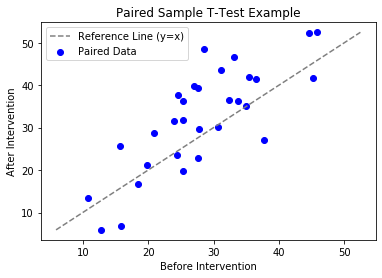

T-Statistic: -2.9638
P-Value: 0.0060


In [15]:
np.random.seed(42)  # For reproducibility
before_data = np.random.normal(loc=30, scale=10, size=30)
after_data = before_data + np.random.normal(loc=5, scale=8, size=30)

# Perform a paired sample t-test
t_stat, p_value = stats.ttest_rel(before_data, after_data)

# Set up the figure and axes
fig, ax = plt.subplots()

# Plot the paired data points
ax.scatter(before_data, after_data, label='Paired Data', color='blue')

# Plot the diagonal line (y = x) for reference
ax.plot([min(before_data.min(), after_data.min()), max(before_data.max(), after_data.max())],
        [min(before_data.min(), after_data.min()), max(before_data.max(), after_data.max())],
        linestyle='--', color='gray', label='Reference Line (y=x)')

# Add labels and legend
ax.set_xlabel('Before Intervention')
ax.set_ylabel('After Intervention')
ax.set_title('Paired Sample T-Test Example')
ax.legend()

# Display the plot
plt.show()

# Output the t-statistic and p-value
print(f'T-Statistic: {t_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

In [3]:
np.random.seed(42)
factor_A = np.repeat(['A1', 'A2'], 30)
factor_B = np.tile(['B1', 'B2', 'B3'], 20)
data = np.random.normal(loc=50, scale=10, size=60)

In [4]:
anova_results = f_oneway(
    data[factor_A == 'A1'], 
    data[factor_A == 'A2'],
    data[factor_B == 'B1'], 
    data[factor_B == 'B2'], 
    data[factor_B == 'B3']
)

In [5]:
plot_data = np.array(
    [
        data[factor_A == 'A1'], 
        data[factor_A == 'A2'],
        data[factor_B == 'B1'], 
        data[factor_B == 'B2'], 
        data[factor_B == 'B3']
    ]
)


ANOVA Results:
F-statistic: 0.4173
P-value: 0.7959


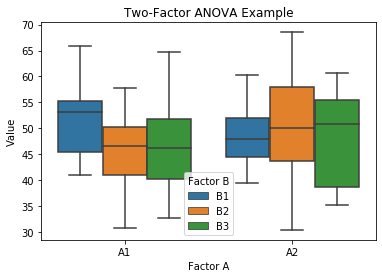

In [11]:
fig, ax = plt.subplots()
sns.boxplot(x=np.repeat(['A1', 'A2'], 30), y=data, hue=factor_B, ax=ax)
ax.set_xlabel('Factor A')
ax.set_ylabel('Value')
ax.set_title('Two-Factor ANOVA Example')
ax.legend(title='Factor B')
ax.set_xlabel('Factor A')
ax.set_ylabel('Value')
ax.set_title('Two-Factor ANOVA Example')
ax.legend(title='Factor B')

print("ANOVA Results:")
print(f'F-statistic: {anova_results.statistic:.4f}')
print(f'P-value: {anova_results.pvalue:.4f}')